## Partie Analyse

### recupération de la data base

instalation des librairies necessaires :

In [57]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("../4072eb5e-e963-4a17-a794-3ea028d0a9c4.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Netoyage

#### Etude des valeurs nulles

In [62]:
import missingno as msno

<Axes: >

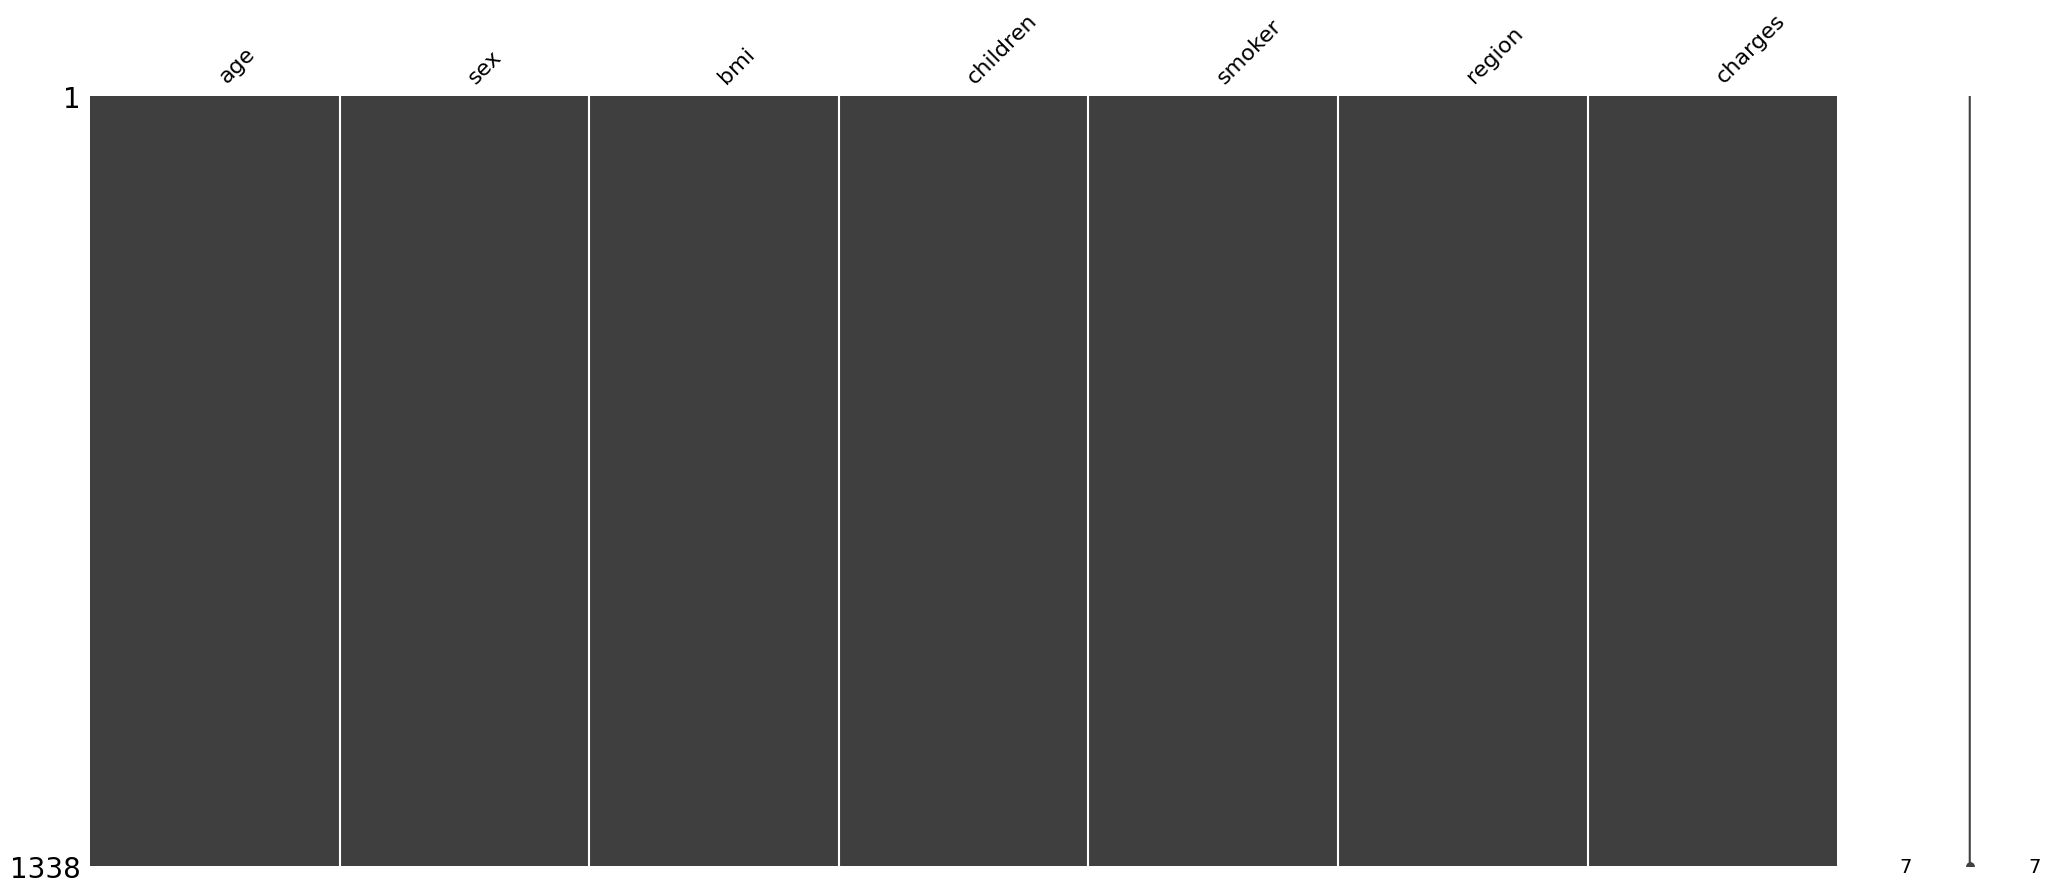

In [63]:
msno.matrix(df)

Comme on a pu voir dans le .info(), il n'y a aucune valeurs nulls.

#### Etude des doublons

In [64]:
for i, bool in enumerate(df.duplicated()):
    if bool:
        print(f"la valeur à l'index {i} est en double")

la valeur à l'index 581 est en double


Il y  un doublon, on l'enlève !

In [65]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

#### Etude des valeurs aberrantes

<Axes: >

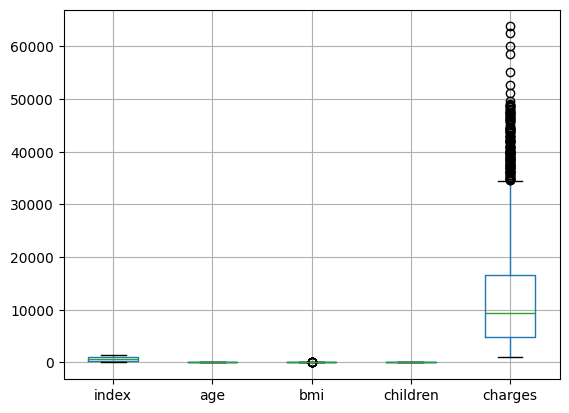

In [66]:
df.boxplot()

On voit qu'il y a des valeurs aberrantes pour les charges et pour le bmi.

<Axes: >

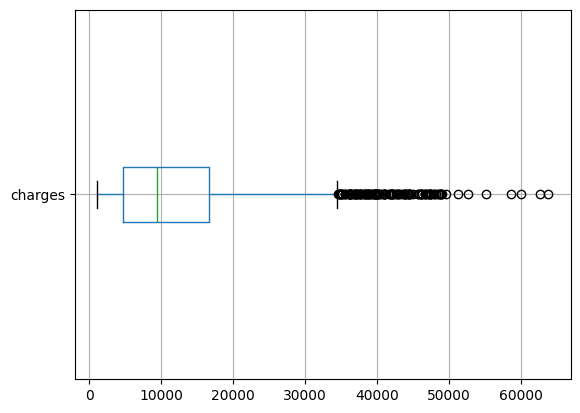

In [67]:
df.boxplot("charges", vert = False)

<Axes: >

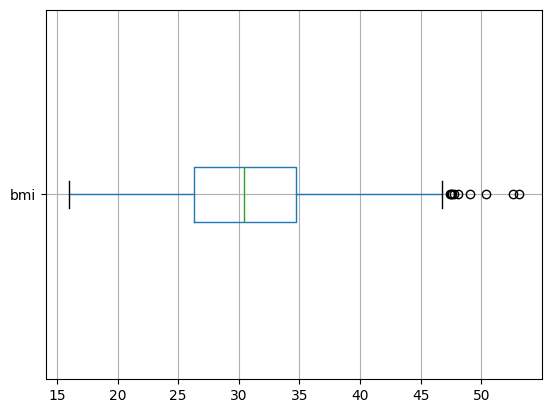

In [68]:
df.boxplot("bmi", vert = False)

Pour autant ces valeurs n'ont pas l'air d'être des erreurs de données et il ne me semble pas pertinent de les supprimer. Essayons de les récuperer pour verifier que ces données sont cohérentes :

In [69]:
#On calcule Q1
q1=df["charges"].quantile(q=0.25)

#On calcule Q3
q3=df["charges"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)
IQR=q3-q1

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR

df_aberrantes= df[df["charges"]>borne_sup]
df_aberrantes.head()

,index,age,sex,bmi,children,smoker,region,charges
14,14,27,male,42.13,0,yes,southeast,39611.7577
19,19,30,male,35.30,0,yes,southwest,36837.4670
23,23,34,female,31.92,1,yes,northeast,37701.8768
29,29,31,male,36.30,2,yes,southwest,38711.0000
30,30,22,male,35.60,0,yes,southwest,35585.5760


In [70]:
df_aberrantes.describe()

,index,age,bmi,children,charges
count,139.000000,139.000000,139.000000,139.000000,139.000000
mean,655.316547,41.079137,35.564604,1.187050,42103.947206
std,400.386155,13.801420,4.434917,1.126546,5582.168107
min,14.000000,18.000000,22.895000,0.000000,34617.840650
25%,290.000000,30.000000,32.667500,0.000000,37786.149950
50%,668.000000,43.000000,35.200000,1.000000,40974.164900
75%,1026.500000,52.500000,37.660000,2.000000,45786.706425
max,1323.000000,64.000000,52.580000,4.000000,63770.428010


In [71]:
df_aberrantes["smoker"].value_counts()

smoker
yes    136
no       3
Name: count, dtype: int64

Ces valeurs ont l'air cohérentes... On ne va pas les supprimer.

In [72]:
# Même chose avec le bmi
q1=df["bmi"].quantile(q=0.25)
q3=df["bmi"].quantile(q=0.75)
IQR=q3-q1
borne_sup = q3 +1.5*IQR

df_aberrantes_bmi= df[df["bmi"]>borne_sup]
df_aberrantes_bmi

,index,age,sex,bmi,children,smoker,region,charges
116,116,58,male,49.06,0,no,southeast,11381.32540
286,286,46,female,48.07,2,no,northeast,9432.92530
401,401,47,male,47.52,1,no,southeast,8083.91980
543,543,54,female,47.41,0,yes,southeast,63770.42801
846,847,23,male,50.38,1,no,southeast,2438.05520
859,860,37,female,47.60,2,yes,southwest,46113.51100
1046,1047,22,male,52.58,1,yes,southeast,44501.39820
1087,1088,52,male,47.74,1,no,southeast,9748.91060
1316,1317,18,male,53.13,0,no,southeast,1163.46270


De même il n'y a pas d'erreurs d'observation dans ces données...

### Analyse univariée

In [73]:
import matplotlib.pyplot as plt
import numpy as np

#### genre

In [74]:
df_sex = df.groupby("sex")["charges"].mean()
df_sex

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

<Axes: title={'center': 'Redevances en fonction du genre'}, xlabel='sex'>

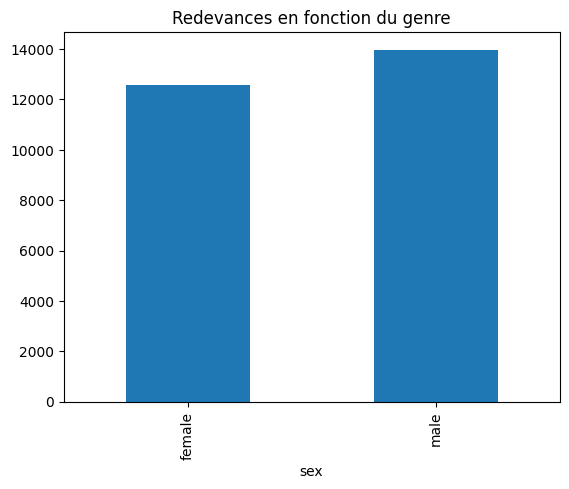

In [75]:
plt.title('Redevances en fonction du genre')
df_sex.plot(kind= "bar")

Peu de différence si ce n'est que les femmes payents sensiblement moins cher...

#### bmi

<Axes: xlabel='bmi', ylabel='charges'>

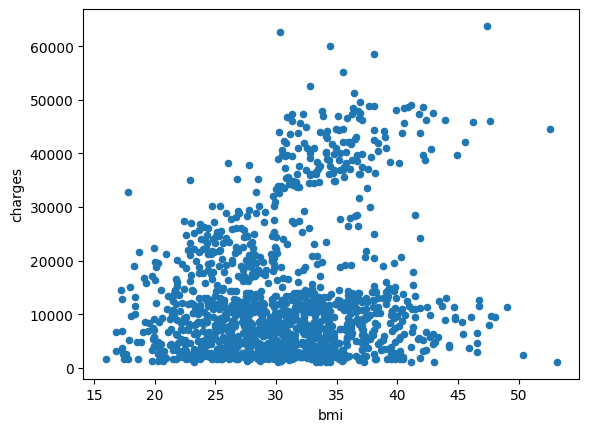

In [76]:
df_bmi = df[["bmi", "charges"]]
df_bmi.plot(x = "bmi", y="charges" , kind="scatter")

In [77]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


#### age

<Axes: xlabel='age', ylabel='charges'>

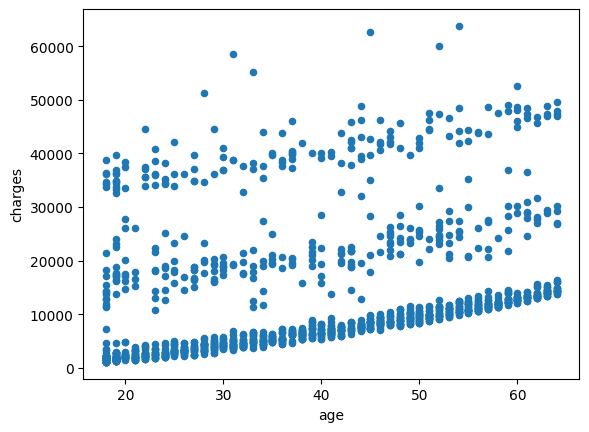

In [78]:
df_age = df[["age", "charges"]]
df_age.plot(x = "age", y="charges" , kind="scatter")

#### children

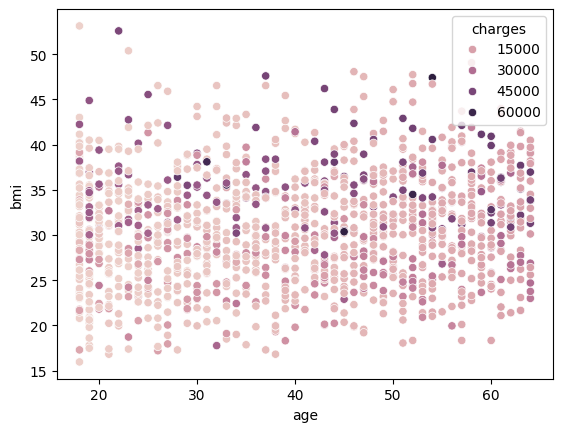

In [79]:
import seaborn as sns

_ = sns.scatterplot(
    x="age",
    y="bmi",
    data=df,
    hue=df["charges"],
)

In [80]:
# Définir les tranches de BMI
bins = [0, 18.5, 24.9, 29.9, 40, 100]  # Tranches de BMI
labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df['BMI_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

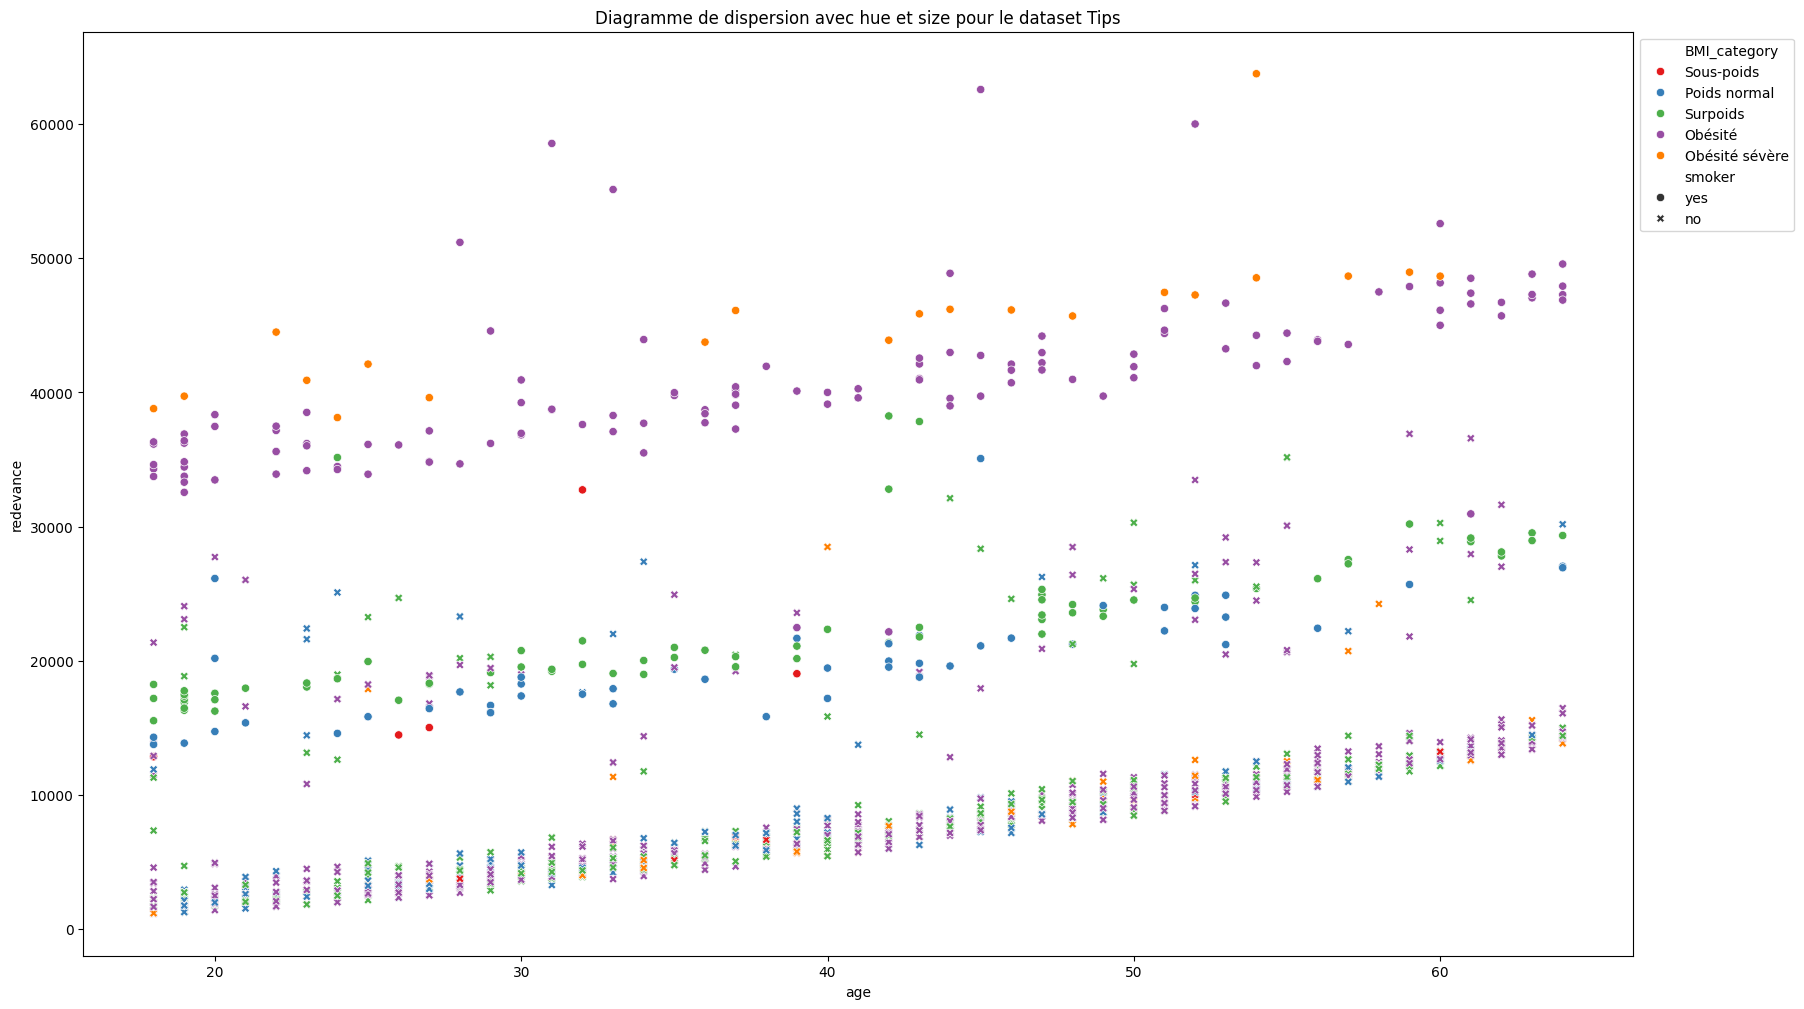

In [81]:
# Diagramme de dispersion avec teinte (hue) et taille (size)
plt.figure(figsize=(20, 12))
sns.scatterplot(
    x="age", 
    y="charges", 
    data=df, 
    hue="BMI_category",        # Couleur par jour (catégoriel)
    style = 'smoker',
    # size="size",      # Varier la taille du marqueur par colonne de taille (numérique)
    sizes=(20, 200),  # Définir la taille des marqueurs
    palette="Set1"    # Palette de couleurs
)
plt.title("Diagramme de dispersion avec hue et size pour le dataset Tips")
plt.xlabel("age")
plt.ylabel("redevance")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [82]:
df.head()

,index,age,sex,bmi,children,smoker,region,charges,BMI_category
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids


In [83]:
df['first_ligne'] = df.apply(
    lambda row: row['age'] if row["charges"] < 10000 or row['BMI_category'] in {"Sous-poids", "Poids normal"} and row['smoker'] == 'no' and row["charges"] < 18000 else 0,
    axis=1
)
df


,index,age,sex,bmi,children,smoker,region,charges,BMI_category,first_ligne
0,0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,0
1,1,18,male,33.770,1,no,southeast,1725.55230,Obésité,18
2,2,28,male,33.000,3,no,southeast,4449.46200,Obésité,28
3,3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,0
4,4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,32
...,...,...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,0
1333,1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,18
1334,1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,18
1335,1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,21


In [84]:
df2 = df[df['first_ligne'] != 0]

# Réinitialiser les index si nécessaire
df2 = df2.reset_index(drop=True)

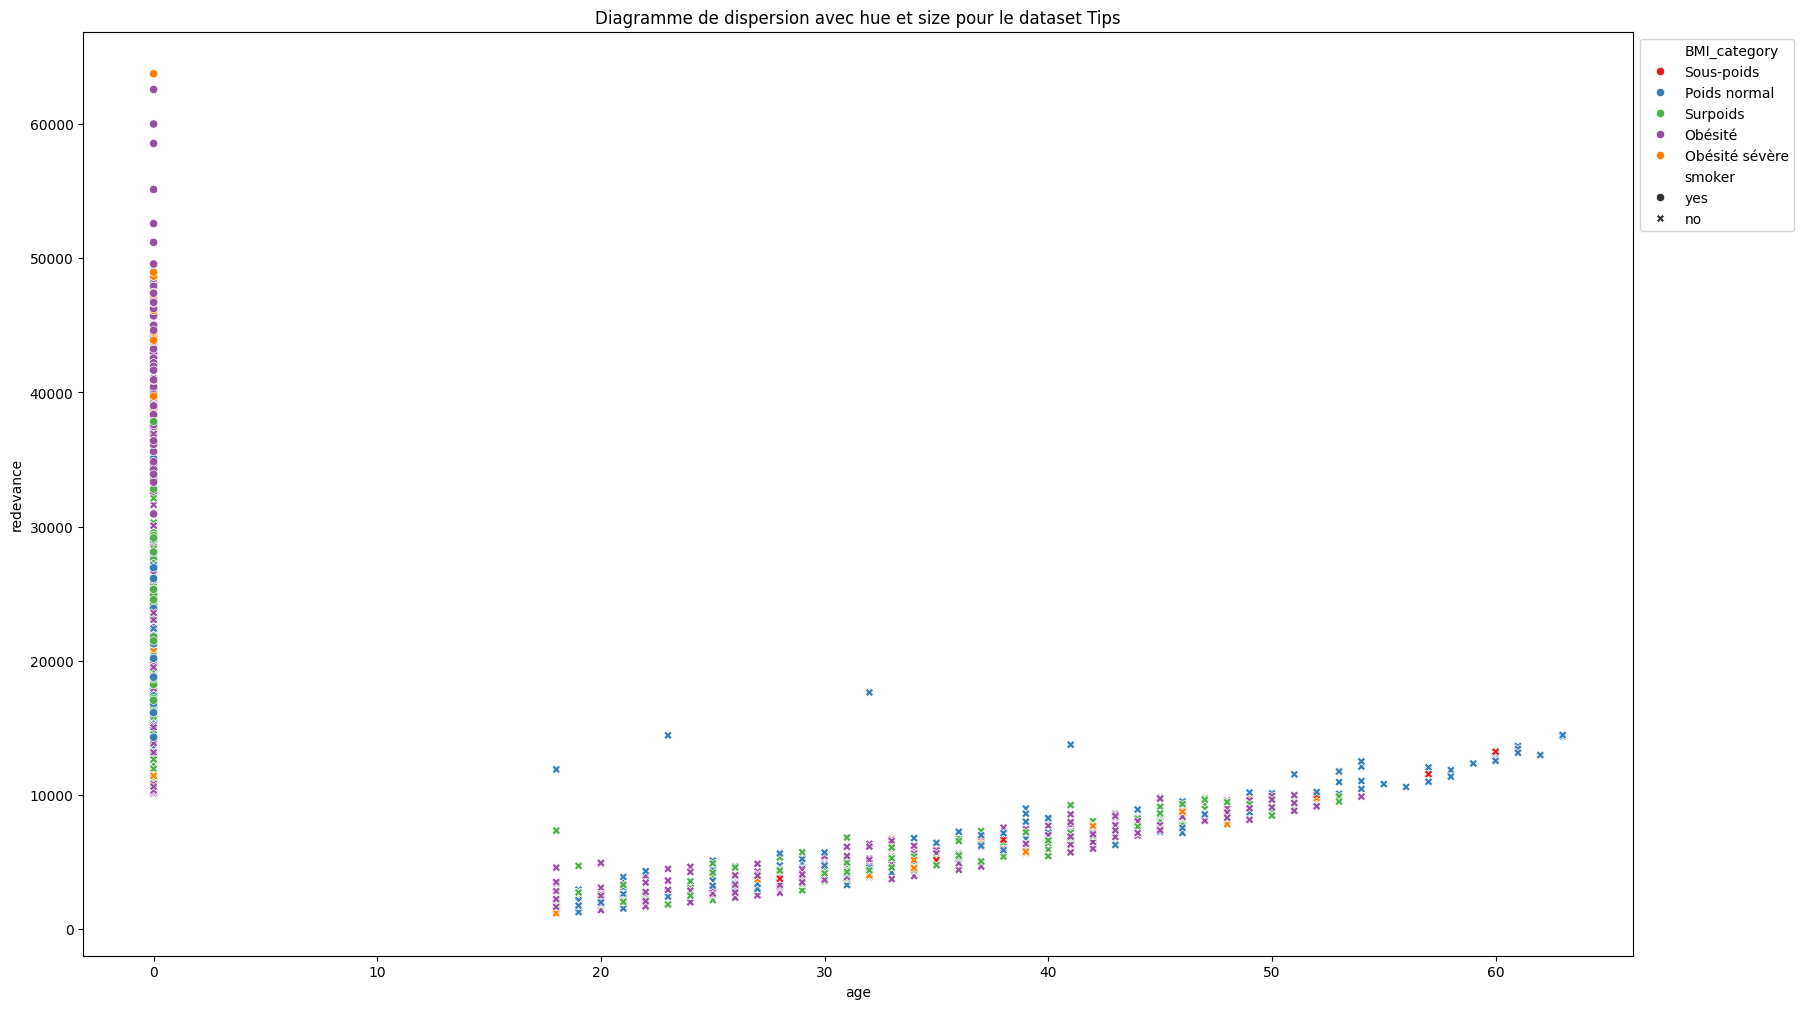

In [85]:
# Diagramme de dispersion avec teinte (hue) et taille (size)
plt.figure(figsize=(20, 12))
sns.scatterplot(
    x="first_ligne", 
    y="charges", 
    data=df, 
    hue="BMI_category",        # Couleur par jour (catégoriel)
    style = 'smoker',
    # size="size",      # Varier la taille du marqueur par colonne de taille (numérique)
    sizes=(20, 200),  # Définir la taille des marqueurs
    palette="Set1"    # Palette de couleurs
)
plt.title("Diagramme de dispersion avec hue et size pour le dataset Tips")
plt.xlabel("age")
plt.ylabel("redevance")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

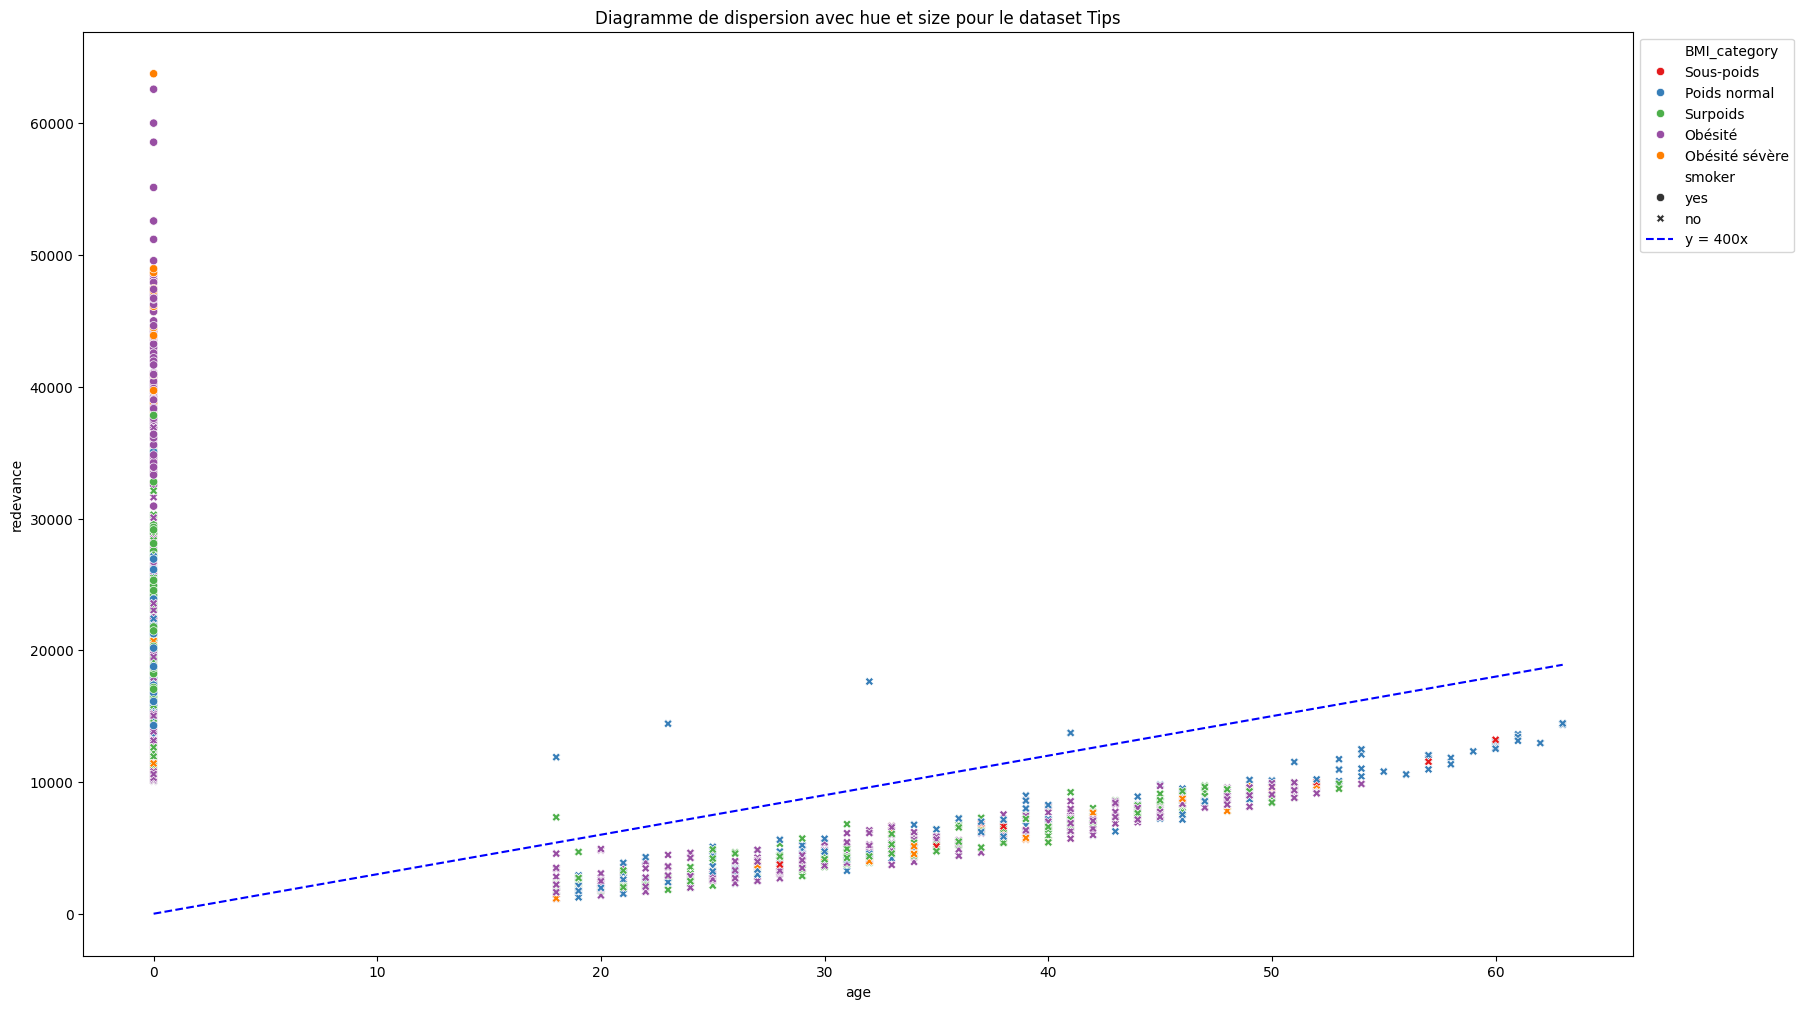

In [86]:
# Diagramme de dispersion avec teinte (hue) et taille (size)
plt.figure(figsize=(20, 12))
sns.scatterplot(
    x="first_ligne", 
    y="charges", 
    data=df, 
    hue="BMI_category",        # Couleur par jour (catégoriel)
    style = 'smoker',
    # size="size",      # Varier la taille du marqueur par colonne de taille (numérique)
    sizes=(20, 200),  # Définir la taille des marqueurs
    palette="Set1"    # Palette de couleurs
)
x_vals = np.linspace(df["first_ligne"].min(), df["first_ligne"].max(), 100)
y_vals = 300 * x_vals
plt.plot(x_vals, y_vals, color='blue', linestyle='--', label='y = 400x')
plt.title("Diagramme de dispersion avec hue et size pour le dataset Tips")
plt.xlabel("age")
plt.ylabel("redevance")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [91]:
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures

In [89]:
df2 = df.copy()
df2 = df2[["smoker","bmi"]]
enc = OrdinalEncoder()
enc.fit(df2)
enc.fit(df2[["smoker"]])
df2["smoker"] = enc.transform(df2[["smoker"]])

In [90]:
df2.head(3)

,smoker,bmi
0,1.0,27.90
1,0.0,33.77
2,0.0,33.00


In [92]:
poly = PolynomialFeatures()
poly.fit(df2)
df2 = poly.transform(df2)

In [94]:
poly.get_feature_names_out()

array(['1', 'smoker', 'bmi', 'smoker^2', 'smoker bmi', 'bmi^2'],
      dtype=object)

In [95]:
df3 = pd.DataFrame(data = df2, columns= poly.get_feature_names_out())

In [98]:
df3.drop("1", axis=1).head(3)

,smoker,bmi,smoker^2,smoker bmi,bmi^2
0,1.0,27.90,1.0,27.9,778.4100
1,0.0,33.77,0.0,0.0,1140.4129
2,0.0,33.00,0.0,0.0,1089.0000
